In [1]:
%matplotlib inline

# Demonstration of how to fit halo MAHs with the `diffmah` model

This notebook illustrates a worked example of how to fit an individual halo MAH with the diffmah model. For a parallelized script, see `history_fitting_script.py`.

## Load a block of target data

These data can be downloaded from the site hosting the project data. But in principle the fitting function should work main progenitors from any sim.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('/global/homes/j/jderose/project/helpers/')
sys.path.append('/global/homes/j/jderose/project/diffmah/')
from diffmah.load_mah_data import load_tng_data, TASSO
from helpers.SimulationAnalysis import getMainBranch, iterTrees


In [13]:

tree_iter = iterTrees('/global/project/projectdirs/cosmosim/slac/jderose/highres_emu/Box004/output/rockstar/trees/tree_0_0_0.dat')

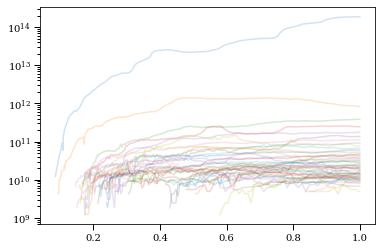

In [14]:
log_mahs = []
scales = []
for i, tree in enumerate(tree_iter):
    if i%1000 != 0: continue
    mb = tree[getMainBranch(tree)]
    log_mahs.append(np.log10(mb['Mvir']))
    scales.append(mb['scale'])
    plt.semilogy(mb['scale'], mb['Mvir'], alpha=0.2)


## Pick a particular example halo history to fit

In [7]:
from diffmah.fit_mah_helpers import get_loss_data
from diffmah.fit_mah_helpers import log_mah_mse_loss_and_grads
from diffmah.utils import jax_adam_wrapper

itest = 0
log_mah_sim = log_mahs[itest, :]

p_init, loss_data = get_loss_data(t_tng, log_mah_sim, log_mah_fit_min)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

## Use Adam to fit the MAH with the smooth model

In [ ]:
n_step = 200
_res = jax_adam_wrapper(log_mah_mse_loss_and_grads, p_init, loss_data, n_step, n_warmup=1)
p_best, loss, loss_arr, params_arr, fit_terminates = _res

## Inspect the loss curve to see if we're converged 

(or if fewer steps can be taken for faster fitting)

In [ ]:
fig, ax = plt.subplots(1, 1)
__=ax.plot(np.log10(loss_arr))

## Grab the unbounded values of the best-fit parameters

In [ ]:
logtc, ue, ul = p_best
logt_target, log_mah_target, logtmp, k, logmp_fit = loss_data

## Transform the unbounded parameters to the actual `diffmah` parameters

In [ ]:
from diffmah.individual_halo_assembly import _get_early_late
early, late = _get_early_late(ue, ul)

## Calculate the MAH using the best-fit model

In [ ]:
from diffmah.individual_halo_assembly import _calc_halo_history

tarr = np.linspace(0.75, 13.8, 500)
lgtarr = np.log10(tarr)
dmhdt_fit, log_mah_fit = _calc_halo_history(lgtarr, lgtarr[-1], logmp_fit, logtc, k, early, late)

## Compare the model to the simulated MAH

In [ ]:
fig, ax = plt.subplots(1, 1)
__=ax.plot(logt_target, log_mah_target)
__=ax.plot(lgtarr, log_mah_fit)